<a href="https://colab.research.google.com/github/eshaansdoshi-sketch/ML_projects/blob/main/Task1_s4ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("counterfeit_products_renamed.csv")

print("Shape:", df.shape)
print(df.dtypes)

display(df.head(10))

Shape: (5000, 27)
item_ref              object
vendor_code           object
product_type          object
manufacturer          object
cost_usd             float64
vendor_score         float64
feedback_count         int64
image_qty              int64
desc_chars             int64
delivery_period        int64
typo_count             int64
site_age             float64
contact_valid           bool
return_clarity          bool
payment_options        int64
post_timestamp        object
vendor_nation         object
dispatch_loc          object
page_hits              int64
sales_vol              int64
saved_items            int64
trust_seals            int64
guarantee_term         int64
wholesale_avail         bool
payment_anomaly         bool
geo_inconsistency     object
fraud_indicator         bool
dtype: object


,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
5,52a410fa,seller_7863,Pharmaceuticals,BioMed Solutions,NaN,4.0,7729,9,451,9,...,NaN,347,23,12,0,14,False,False,False,False
6,59e1a27b,seller_6618,Pharmaceuticals,BeautyLu×,NaN,1.0,8,2,178,25,...,GB,401,34,2,0,4,False,False,False,True
7,b8fa970d,seller_3454,Electronics,NaturalGl0w,186.00,3.0,27,1,121,25,...,FR,3655,215,36,2,11,False,False,False,True
8,3c4f5456,seller_1502,Fashion,TrendSetter,336.90,4.8,5156,5,812,3,...,DE,4503,358,26,0,14,False,False,False,False
9,f4068089,seller_7019,Fashion,ClassicWear,242.39,3.5,1584,5,774,7,...,IN,1767,150,14,2,3,False,False,NaN,False


In [3]:
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_all = [c for c in df.columns if c not in num_cols_all]

# Gives me unique values
cardinality = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str).values,
    "n_unique_non_null": df.nunique(dropna=True).values
}).sort_values("n_unique_non_null", ascending=False).reset_index(drop=True)

display(cardinality.head(30))

if num_cols_all:
    print("\nNumeric summary:")
    display(df[num_cols_all].describe().T)
else:
    print("\nNo numeric columns found.")


,column,dtype,n_unique_non_null
0,item_ref,object,5000
1,vendor_code,object,3828
2,cost_usd,float64,3509
3,page_hits,int64,3135
4,feedback_count,int64,3059
5,site_age,float64,2551
6,post_timestamp,object,2227
7,desc_chars,int64,945
8,sales_vol,int64,451
9,saved_items,int64,100



Numeric summary:


,count,mean,std,min,25%,50%,75%,max
cost_usd,3652.0,224.710643,136.900310,10.12,109.825,191.815,336.615,499.84000
vendor_score,5000.0,3.732980,0.995313,1.00,3.500,4.000,4.500,5.00000
feedback_count,5000.0,3529.809200,3281.418979,0.00,85.000,2922.500,6401.500,9996.00000
image_qty,5000.0,4.686200,2.651629,1.00,2.000,5.000,7.000,9.00000
desc_chars,5000.0,463.564000,294.294690,50.00,179.000,433.500,725.250,999.00000
delivery_period,5000.0,13.462200,11.549600,1.00,5.000,10.000,18.000,44.00000
typo_count,5000.0,1.093400,1.160752,0.00,0.000,1.000,1.000,4.00000
site_age,5000.0,1467.886499,1174.386070,1.00,308.000,1320.500,2471.000,9995.29178
payment_options,5000.0,3.254000,1.357296,1.00,2.000,3.000,4.000,5.00000
page_hits,5000.0,2469.286600,1424.525316,10.00,1245.750,2433.000,3701.500,4996.00000


In [5]:
missing = df.isna().sum()
missing_summary = pd.DataFrame({
    "column": df.columns,
    "missing_count": missing.values
}).sort_values("missing_count", ascending=False).reset_index(drop=True)
display(missing_summary)

,column,missing_count
0,cost_usd,1348
1,geo_inconsistency,1249
2,dispatch_loc,747
3,product_type,0
4,manufacturer,0
5,vendor_score,0
6,feedback_count,0
7,image_qty,0
8,desc_chars,0
9,vendor_code,0


In [6]:
n_dup = int(df.duplicated().sum())
print("Duplicate rows:", n_dup)



Duplicate rows: 0


In [45]:
def iqr_outlier_counts(series: pd.Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or pd.isna(iqr):
        return 0, q1, q3
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    count = int(((series < lower) | (series > upper)).sum())
    return count

outlier_records = []
for c in num_cols_all:
    s = df[c].dropna()
    cnt = iqr_outlier_counts(s)
    outlier_records.append({"column": c, "outlier_count": cnt})

outlier_summary = pd.DataFrame(outlier_records).sort_values("outlier_count", ascending=False)
display(outlier_summary.head(20))

,column,outlier_count
6,typo_count,726
1,vendor_score,470
5,delivery_period,322
10,sales_vol,85
7,site_age,10
0,cost_usd,0
4,desc_chars,0
3,image_qty,0
2,feedback_count,0
8,payment_options,0


In [ ]:
print(df['fraud_indicator'])

0       False
1        True
2        True
3       False
4       False
        ...  
4995    False
4996     True
4997    False
4998     True
4999    False
Name: fraud_indicator, Length: 5000, dtype: bool


In [10]:
for col in num_cols_all:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols_all:
    df[col] = df[col].fillna(df[col].mode()[0])


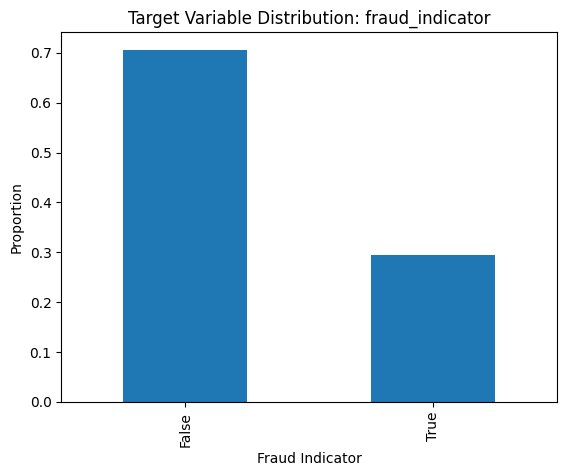

,proportion
fraud_indicator,
False,0.706
True,0.294


In [13]:
df['fraud_indicator'].value_counts(normalize=True).plot(
    kind='bar')
plt.title("Target Variable Distribution: fraud_indicator")
plt.xlabel("Fraud Indicator")
plt.ylabel("Proportion")
plt.show()
df['fraud_indicator'].value_counts(normalize=True)


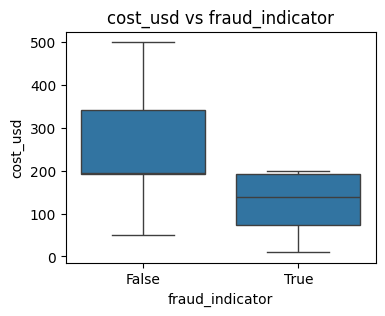

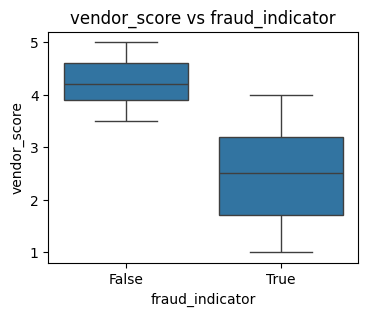

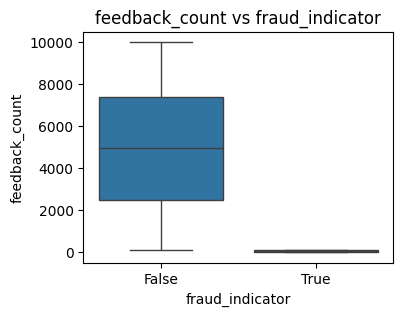

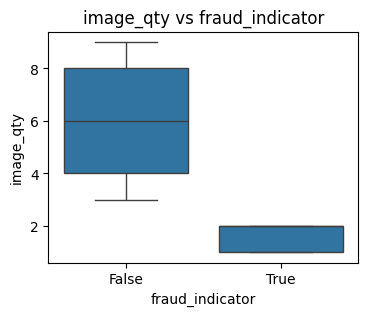

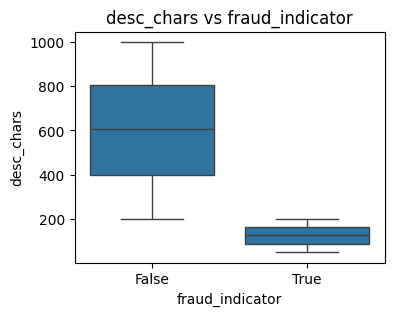

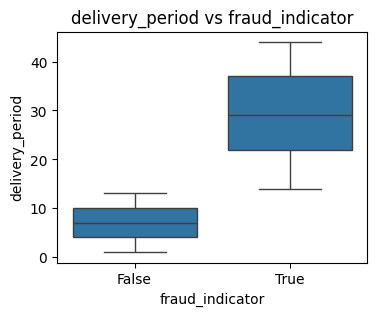

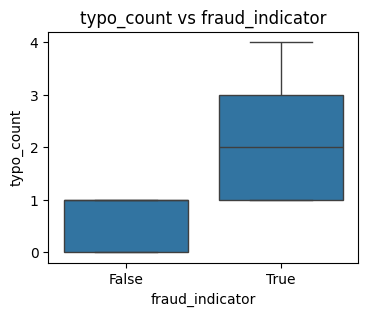

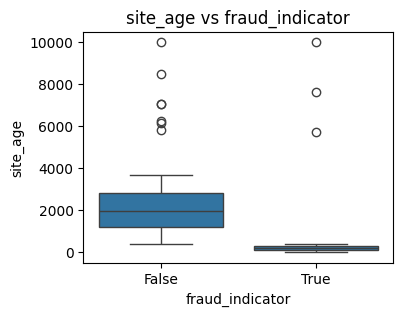

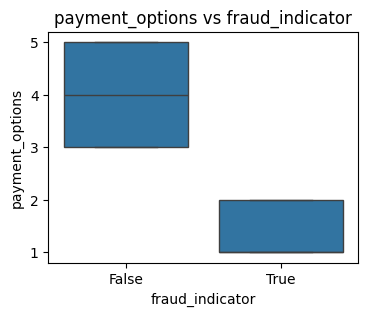

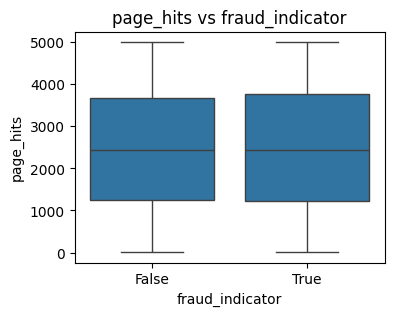

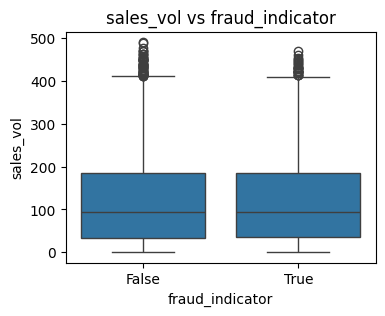

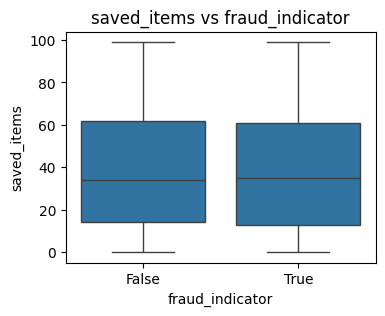

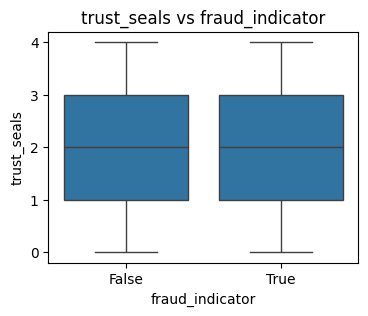

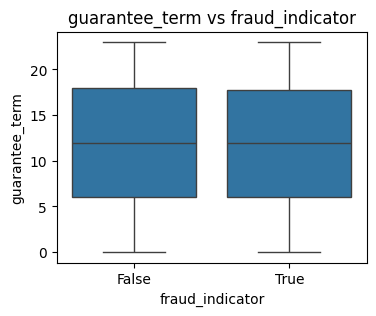

In [15]:
for col in num_cols_all:
    plt.figure(figsize=(4,3))
    sns.boxplot(x='fraud_indicator', y=col, data=df)
    plt.title(f"{col} vs fraud_indicator")
    plt.show()


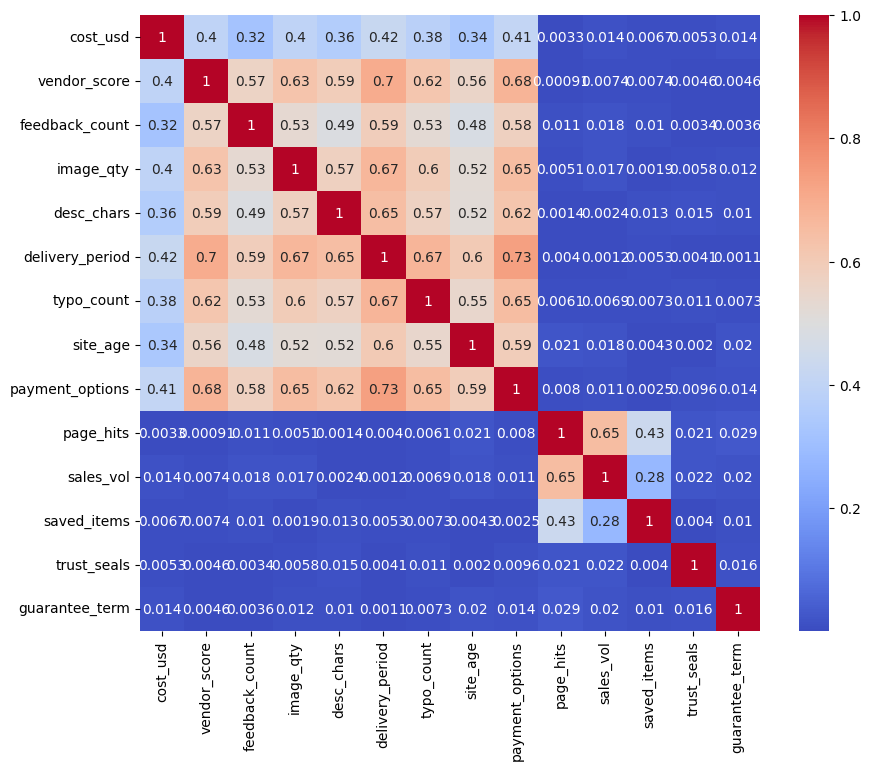

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols_all].corr().abs(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
### TASK2

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop("fraud_indicator", axis=1)
y = df["fraud_indicator"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=47, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=y_temp)

numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore",sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)])

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


Train: (3000, 26) Validation: (1000, 26) Test: (1000, 26)


In [40]:
X_train

array([[ 4.69730096e-01, -1.29983801e-01, -5.40202396e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.14198407e+00,  1.16388252e+00, -7.22796583e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.72263572e-04,  6.90725558e-02,  1.30722814e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.66683920e-01, -3.04556226e-02,  1.90945835e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.18442510e-01, -2.29511979e-01, -1.06816966e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.18442510e-01, -3.04556226e-02, -2.62117399e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logreg_clf = LogisticRegression()

# Random Forest pipeline
rf_clf = RandomForestClassifier( random_state=400)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  classification_report

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    print("\nClassification Report:\n", classification_report(y_val, y_pred))


logreg_clf.fit(X_train, y_train)
evaluate_model(logreg_clf, X_val, y_val)

rf_clf.fit(X_train, y_train)
evaluate_model(rf_clf, X_val, y_val)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       706
        True       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       706
        True       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[706   0]
 [  0 294]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       706
        True       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

